# Project: 2019 Ford Gobike's Bay Wheel Data Visualization 

## Table of Contents 
<a name="top"></a>
<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#q">Question</a></li>
    <li><a href="#dw">Data Wrangling</a></li>
    <li><a href="eda">Exploratory Data Analysis</a></li>
    <li><a href="edas">Explanatory Data Analysis</a></li>
    <li><a href="limit">Limitation</a></li>
    <li><a href="conclu">Conclusion</a></li>
</ul>

<a id='intro'></a>
## Introduction
<a href="#top">Back to Table of Content</a>
> I have chosen a dataset on Ford Gobik's Bay Wheel Data. I am interested to see the trends such as consumer's age range e.g. customer segmentation, their starting and ending point of rental as well as frequencies of services usage. I will visualize the data by using seaborn and matplotlib.   

<a id='q'></a>
## Question
<a href="#top">Back to Table of Content</a>
> <strong>For this dataset I will be looking for a features that will influnce the duration of the bike trip.</strong>

<a id='dw'></a>
## Data Wrangling
<a href="#top">Back to Table of Content</a>

In [1]:
#import libraries
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(style="darkgrid")

In [2]:
#combine all the year 2019 files in the dataset folder 
path = r'C:\Users\isaph\Desktop\Dataset' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df) 

df = pd.concat(li, axis=0, ignore_index=True)

C:\Users\isaph\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\isaph\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\isaph\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.to_csv('2019bikedata.csv')

In [4]:
df = pd.read_csv('2019bikedata.csv')

C:\Users\isaph\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.head()

,Unnamed: 0,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,No,NaN
1,1,65900,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,No,NaN
2,2,62633,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,No,NaN
3,3,44680,2019-01-31 19:46:09.7190,2019-02-01 08:10:50.3180,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,No,NaN
4,4,60709,2019-01-31 14:19:01.5410,2019-02-01 07:10:51.0650,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,No,NaN


In [6]:
#adding start_date and start_time
df['start_date'] = pd.to_datetime(df['start_time']).dt.date
df['start_time'] = pd.to_datetime(df['start_time']).dt.time

In [7]:
#adding ending_time
df['end_date'] = pd.to_datetime(df['end_time']).dt.date
df['end_time'] = pd.to_datetime(df['end_time']).dt.time

In [8]:
#convert duration seconds to hours 
df['duration_min']=df['duration_sec']/60
df['duration_hr']=df['duration_min']/60
df['duration_min']=df['duration_min'].astype(float)
df['duration_hr']=df['duration_hr'].astype(float)

In [9]:
#drop unnessesary columns
df.drop(['start_station_latitude','start_station_longitude', 'end_station_latitude', 'end_station_longitude','bike_share_for_all_trip'], axis=1, inplace=True)

In [10]:
#adding day and month colum extracting from start_date
df['day'] = df['start_date'].apply(lambda r:r.day).astype(int)
df['month'] = df['start_date'].apply(lambda r:r.month).astype(int)

In [11]:
#convert data type from float to str
df['start_station_id'] = df['start_station_id'].astype(str)
df['end_station_id'] = df['end_station_id'].astype(str)

In [60]:
#droping odd time
df['duration_min'].max()

1437.1666666666667

In [57]:
#drop the index with odd time
df.drop([2481276], inplace=True)

In [12]:
df.isnull().sum()

Unnamed: 0                    0
duration_sec                  0
start_time                    0
end_time                      0
start_station_id              0
start_station_name        80133
end_station_id                0
end_station_name          82350
bike_id                       0
user_type                     0
rental_access_method    2386145
start_date                    0
end_date                      0
duration_min                  0
duration_hr                   0
day                           0
month                         0
dtype: int64

In [13]:
#df overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 17 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   duration_sec          int64  
 2   start_time            object 
 3   end_time              object 
 4   start_station_id      object 
 5   start_station_name    object 
 6   end_station_id        object 
 7   end_station_name      object 
 8   bike_id               int64  
 9   user_type             object 
 10  rental_access_method  object 
 11  start_date            object 
 12  end_date              object 
 13  duration_min          float64
 14  duration_hr           float64
 15  day                   int32  
 16  month                 int32  
dtypes: float64(2), int32(2), int64(3), object(10)
memory usage: 306.0+ MB


In [14]:
#rows and columns 
df.shape

(2506983, 17)

In [15]:
#data overview
df.head(10)

,Unnamed: 0,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,rental_access_method,start_date,end_date,duration_min,duration_hr,day,month
0,0,80825,17:57:44.613000,16:24:49.864000,229.0,Foothill Blvd at 42nd Ave,196.0,Grand Ave at Perkins St,4861,Subscriber,NaN,2019-01-31,2019-02-01,1347.083333,22.451389,31,1
1,1,65900,20:58:33.886000,15:16:54.173000,4.0,Cyril Magnin St at Ellis St,134.0,Valencia St at 24th St,5506,Subscriber,NaN,2019-01-31,2019-02-01,1098.333333,18.305556,31,1
2,2,62633,18:06:52.924000,11:30:46.530000,245.0,Downtown Berkeley BART,157.0,65th St at Hollis St,2717,Customer,NaN,2019-01-31,2019-02-01,1043.883333,17.398056,31,1
3,3,44680,19:46:09.719000,08:10:50.318000,85.0,Church St at Duboce Ave,53.0,Grove St at Divisadero,4557,Customer,NaN,2019-01-31,2019-02-01,744.666667,12.411111,31,1
4,4,60709,14:19:01.541000,07:10:51.065000,16.0,Steuart St at Market St,28.0,The Embarcadero at Bryant St,2100,Customer,NaN,2019-01-31,2019-02-01,1011.816667,16.863611,31,1
5,5,6733,22:35:50.813000,00:28:04.512000,245.0,Downtown Berkeley BART,266.0,Parker St at Fulton St,3532,Subscriber,NaN,2019-01-31,2019-02-01,112.216667,1.870278,31,1
6,6,1188,23:54:38.901000,00:14:27.900000,34.0,Father Alfred E Boeddeker Park,146.0,30th St at San Jose Ave,5114,Subscriber,NaN,2019-01-31,2019-02-01,19.800000,0.330000,31,1
7,7,1254,23:48:50.092000,00:09:44.497000,318.0,San Carlos St at Market St,314.0,Santa Clara St at Almaden Blvd,3967,Subscriber,NaN,2019-01-31,2019-02-01,20.900000,0.348333,31,1
8,8,3153,23:17:05.462000,00:09:39.457000,29.0,O'Farrell St at Divisadero St,70.0,Central Ave at Fell St,4813,Subscriber,NaN,2019-01-31,2019-02-01,52.550000,0.875833,31,1
9,9,323,23:59:47.568000,00:05:11.177000,223.0,16th St Mission BART Station 2,129.0,Harrison St at 20th St,1976,Subscriber,NaN,2019-01-31,2019-02-01,5.383333,0.089722,31,1


<a id='eda'></a>
## Exploratory Data Analysis
<a href="#top">Back to Table of Content</a>

> Generate heatmap to see the corelation of the data in the table with numeric variable.

In [16]:
numeric_vars = ['duration_sec', 'bike_id','duration_min','duration_hr','day','month']

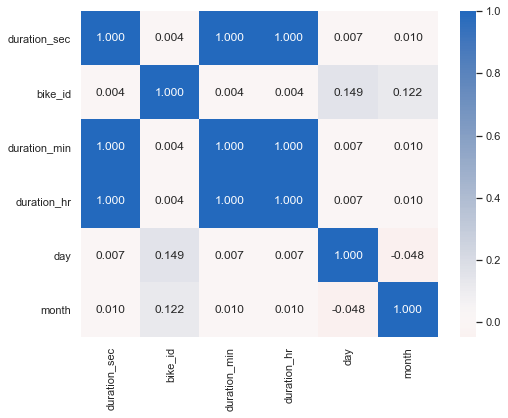

In [17]:
plt.figure(figsize=[8,6])
sns.set(style = "darkgrid")
sns.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',cmap = 'vlag_r', center = 0)

### Univariate Exploration

> Average trip by <strong>seconds</strong>.

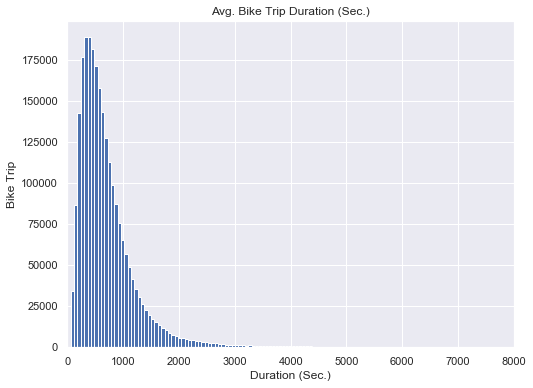

In [18]:
plt.figure(figsize=[8,6])
sns.set(style = "darkgrid")
base_color= sns.color_palette()[0]
bin_edges = np.arange(0, df['duration_sec'].max() + 100 , 60)
ax = plt.hist(data = df , x = 'duration_sec' , bins = bin_edges, color=base_color)
plt.xlim(0,8000)
plt.title('Avg. Bike Trip Duration (Sec.)')
plt.xlabel('Duration (Sec.)')
plt.ylabel('Bike Trip');

> There are <strong>180000</strong> bike trip with average bike duration of <strong>800</strong> seconds.

> Average trip by <strong>minutes</strong>.

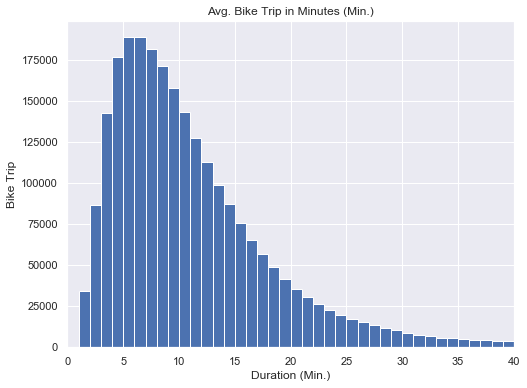

In [19]:
plt.figure(figsize=[8,6])
sns.set(style = "darkgrid")
base_color= sns.color_palette()[0]
bin_edges = np.arange(0, df['duration_min'].max()+1, 1)
plt.hist(data = df, x = 'duration_min', bins = bin_edges)
plt.xlim([0,40])
plt.title('Avg. Bike Trip in Minutes (Min.)')
plt.xlabel('Duration (Min.)')
plt.ylabel('Bike Trip');

> From the histogram plot above we can see that the average in minutes is around <strong>11</strong> minutes. 

> Subscriber Vs. Customer 

Text(0.5, 1.0, 'Subscriber Vs. Customer ')

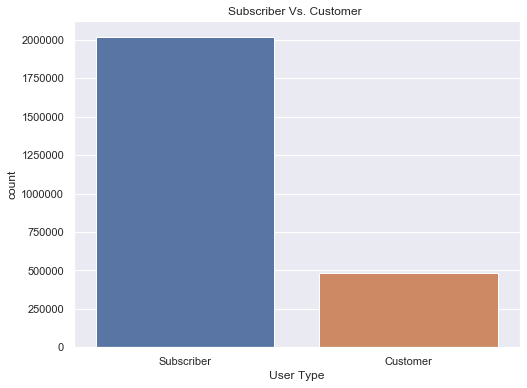

In [20]:
plt.figure(figsize=[8,6])
sns.set(style = "darkgrid")
ax = sns.countplot(data=df,x='user_type')
ax.set_xlabel('User Type')
ax.set_title('Subscriber Vs. Customer ')

> This is clearly stated that the subsciber is more than the customer for the type of user.

> Monthly bike trip 

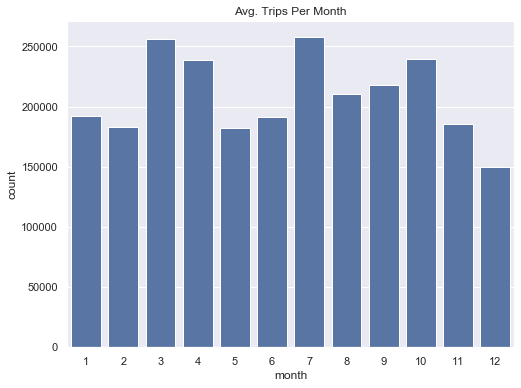

In [21]:
plt.figure(figsize=[8,6])
sns.set(style = "darkgrid")
base_color= sns.color_palette()[0]
ax = sns.countplot(data=df,x='month', color=base_color)
plt.title('Avg. Trips Per Month');

> From the visual above the number looks unstable, with most trip occured in March and July. Perhaps season and weather also have an influence over the trip taken. 

> Daily bike trips

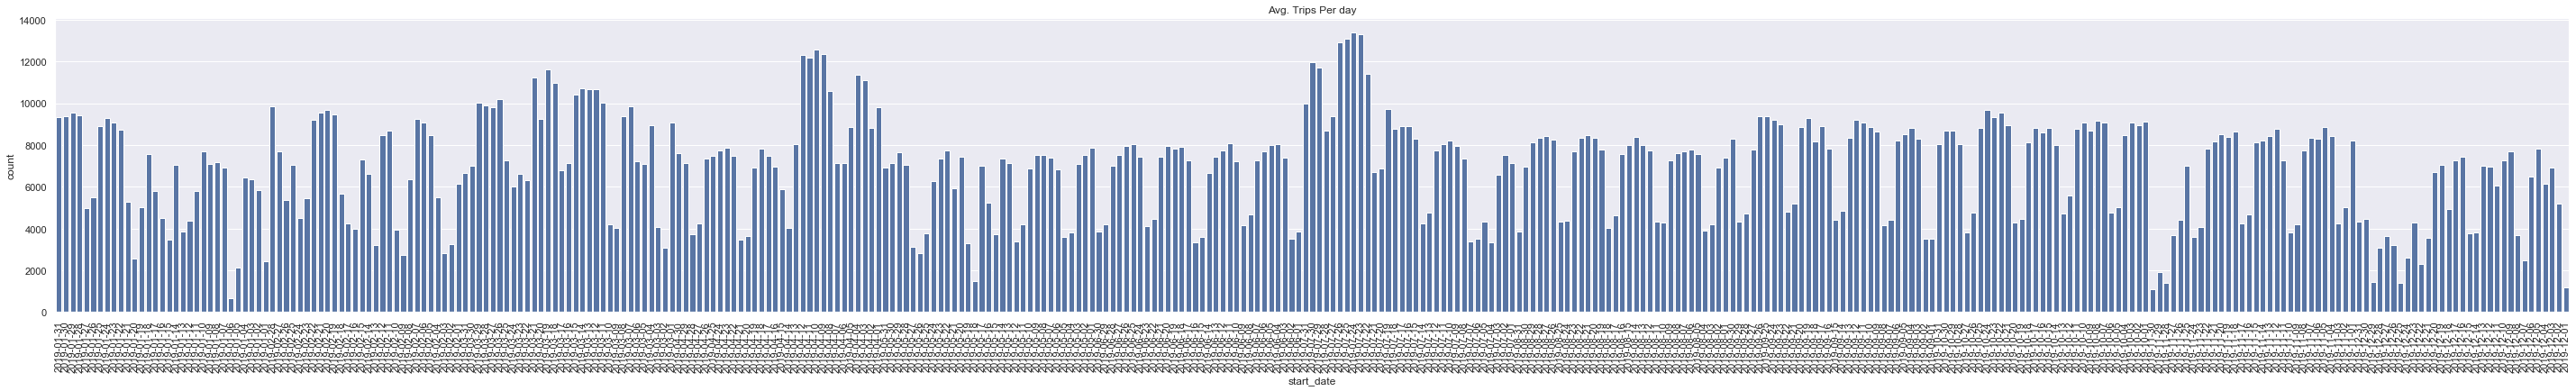

In [23]:
plt.figure(figsize=[50,6])
sns.set(style = "darkgrid")
base_color= sns.color_palette()[0]
ax = sns.countplot(data=df,x='start_date', color=base_color)
plt.title('Avg. Trips Per day')
plt.xticks(rotation=90);

> From the visual, it seem like people usually take a trip in the second half of the month and then decline towards the ends of the month. And from this plot it confirmed that the people are buy riding on the month of July.  

### Bivariate Exploration

In [33]:
numeric_vars2 = ['day','month','duration_min']

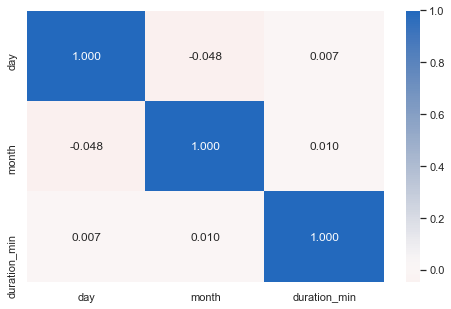

In [34]:
plt.figure(figsize = [8, 5])
sns.heatmap(df[numeric_vars2].corr(), annot = True, fmt = '.3f',cmap = 'vlag_r', center = 0)

> The relationship between <strong>user type (subscriber and customer)</strong> and <strong>the duration that they spend on the bike</strong>.

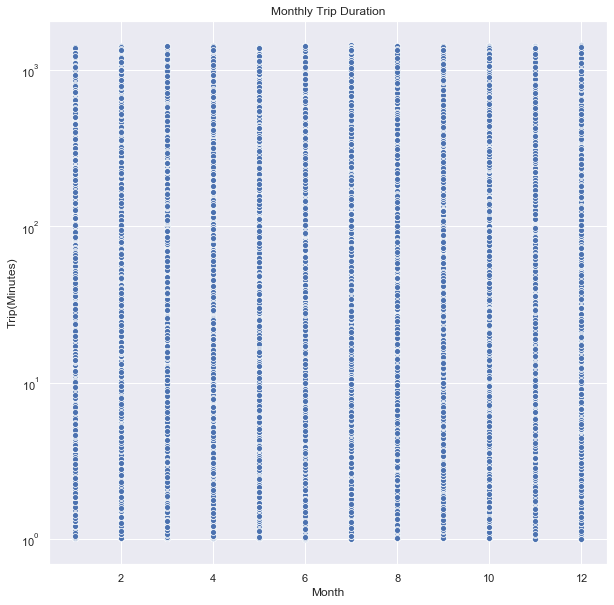

In [58]:
plt.figure(figsize=[10,10])
sns.set(style = "darkgrid")
base_color= sns.color_palette()[0]
ax = sns.scatterplot(data = df , x = 'month' , y = 'duration_min' , color=base_color)
ax.set_yscale('log')
plt.title('Monthly Trip Duration')
plt.xlabel('Month')
plt.ylabel('Trip(Minutes)');

In [185]:
df.head()

,Unnamed: 0,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,rental_access_method,start_date,end_date,duration_min,duration_hr,day,month
0,0,80825,17:57:44.613000,16:24:49.864000,229.0,Foothill Blvd at 42nd Ave,196.0,Grand Ave at Perkins St,4861,Subscriber,NaN,2019-01-31,2019-02-01,1347.083333,22.451389,31,1
1,1,65900,20:58:33.886000,15:16:54.173000,4.0,Cyril Magnin St at Ellis St,134.0,Valencia St at 24th St,5506,Subscriber,NaN,2019-01-31,2019-02-01,1098.333333,18.305556,31,1
2,2,62633,18:06:52.924000,11:30:46.530000,245.0,Downtown Berkeley BART,157.0,65th St at Hollis St,2717,Customer,NaN,2019-01-31,2019-02-01,1043.883333,17.398056,31,1
3,3,44680,19:46:09.719000,08:10:50.318000,85.0,Church St at Duboce Ave,53.0,Grove St at Divisadero,4557,Customer,NaN,2019-01-31,2019-02-01,744.666667,12.411111,31,1
4,4,60709,14:19:01.541000,07:10:51.065000,16.0,Steuart St at Market St,28.0,The Embarcadero at Bryant St,2100,Customer,NaN,2019-01-31,2019-02-01,1011.816667,16.863611,31,1


<a id='edas'></a>
## Explanatory Data Analysis
<a href="#top">Back to Table of Content</a>

<a id='limit'></a>
## Limitation
<a href="#top">Back to Table of Content</a>

<a id='conclu'></a>
## Conclusion
<a href="#top">Back to Table of Content</a>